In [1]:
# | tags: [parameters]
subject = "101"

In [2]:
#| tags: [parameters]
# Injected Parameters
subject = 152


In [3]:
import os
import mne
from pathlib import Path
import autoreject
from autoreject import AutoReject
import numpy as np
import matplotlib.pyplot as plt

from spectral.utils import print_date_time, read_parameters, config_project
from spectral.epochs import create_epochs, get_reject_log
from spectral.viz import plot_epochs

mne.viz.set_browser_backend("matplotlib")
# mne.viz.set_browser_backend("qt")
mne.set_config("MNE_BROWSER_THEME", "light")
# matplotlib.use("Agg")

config = read_parameters()
my_paths = config_project(subject)

project_path = my_paths["project_path"]
raw_preproc_path = my_paths["raw_preproc_path"]
epochs_preproc_path = my_paths["epochs_preproc_path"]

print(epochs_preproc_path)
Path(epochs_preproc_path).mkdir(parents=True, exist_ok=True)

figures_path = my_paths["figures_path"]

print_date_time()

Using matplotlib as 2D backend.


/Users/daniel/PhD/Projects/psd-path/analysis/data/epochs/sub-152/
2024-03-25 12:36:12


# Get bad channels


Opening raw data file /Users/daniel/PhD/Projects/psd-path/analysis/data/raw/sub-152//sub-152_filtered_zap_eeg.fif...


    Range : 0 ... 149000 =      0.000 ...   298.000 secs


Ready.


Reading 0 ... 149000  =      0.000 ...   298.000 secs...


<Info | 11 non-empty values
 bads: 18 items (VREF, E146, E52, E186, E199, E188, E254, E68, E154, ...)
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 257 EEG, 1 ECG
 custom_ref_applied: False
 dig: 260 items (3 Cardinal, 257 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 258
 projs: []
 sfreq: 500.0 Hz
>

Not setting metadata


84 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 84 events and 2501 original time points ...


8 bad epochs dropped


No projector specified for this dataset. Please consider the method self.add_proj.


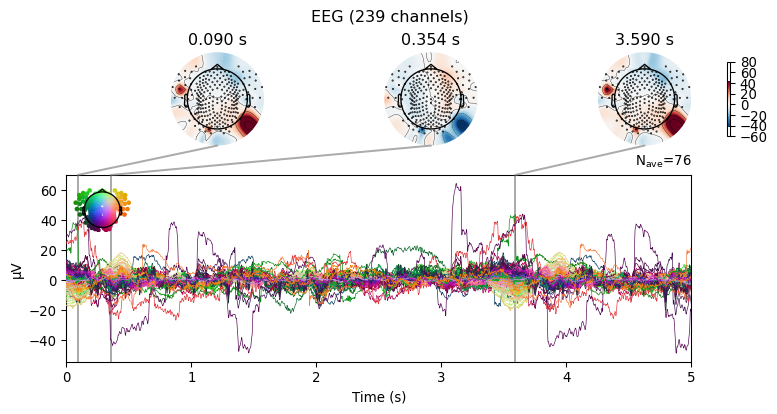

Effective window size : 4.096 (s)


Averaging across epochs...


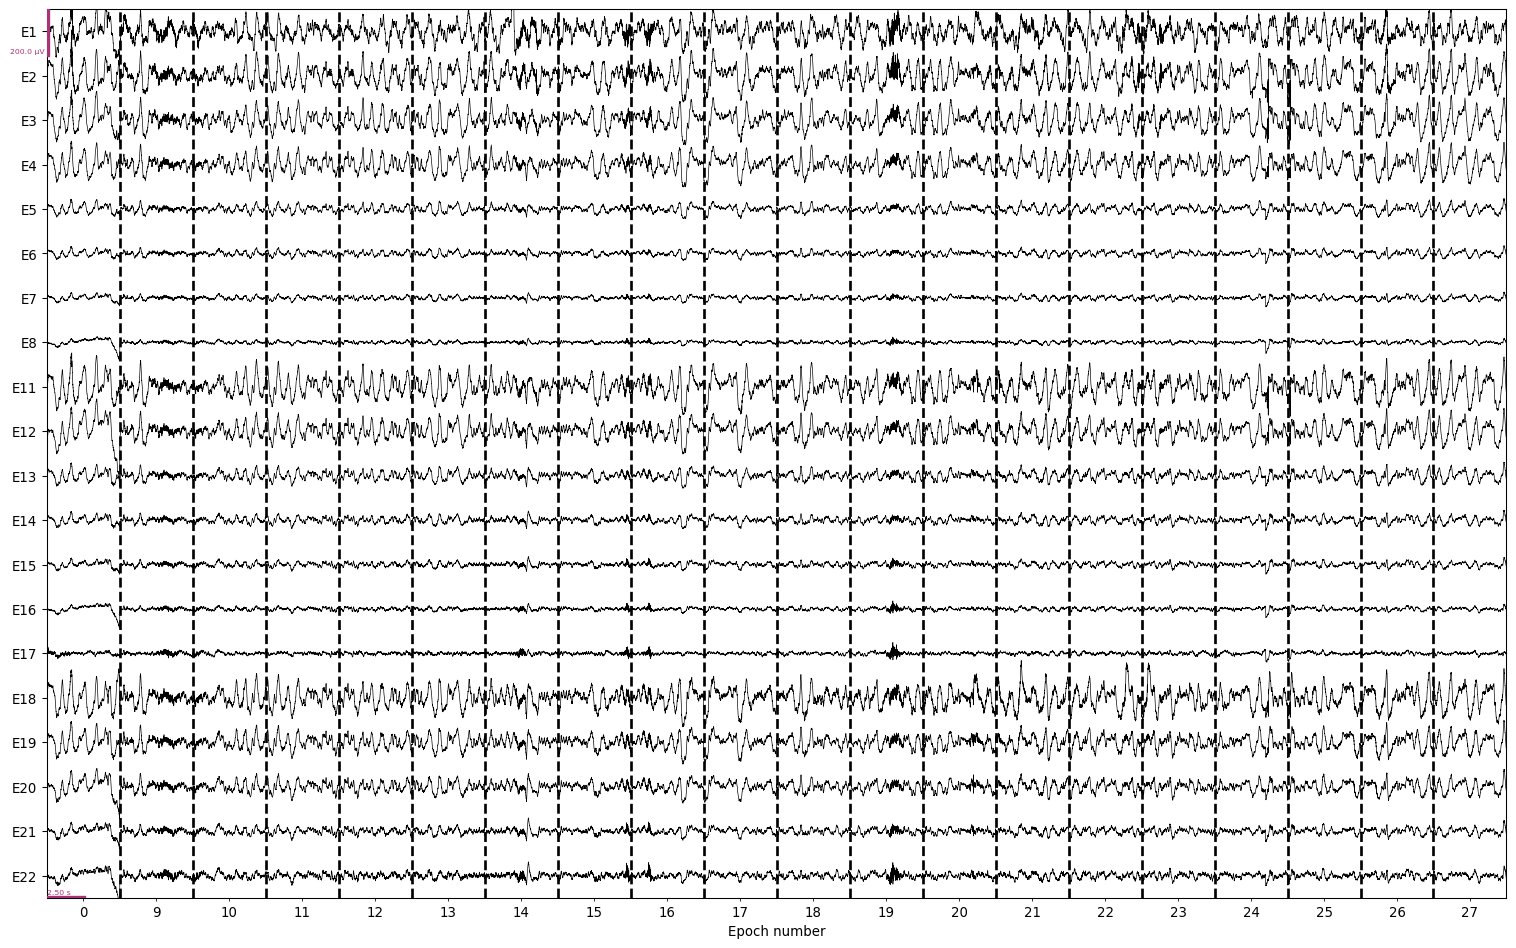

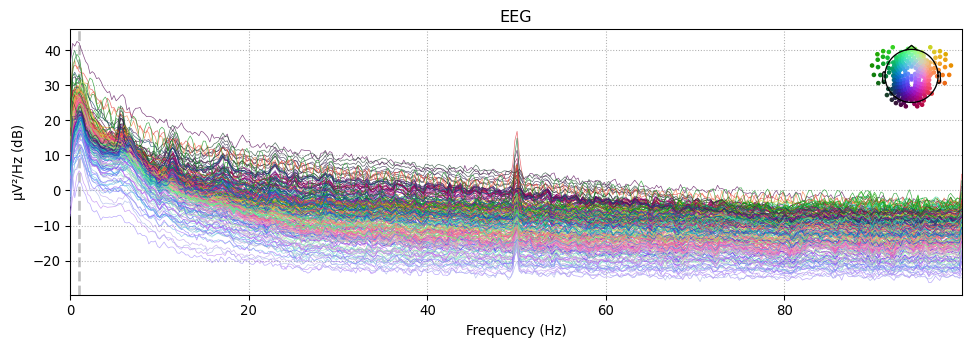

In [4]:
clean_raw = mne.io.read_raw_fif(
    f"{raw_preproc_path}/sub-{subject}_filtered_zap_eeg.fif", preload=True
)
display(clean_raw.info)
# clean_raw_downsampled = clean_raw.copy().resample(250, npad="auto")
epochs = create_epochs(clean_raw, overlap=1.5)
plot_epochs(
    epochs,
    figures_path=figures_path,
    subject=subject,
    stage="epochs",
    n_epochs=20,
    n_channels=20,
)

fitting finished


Dropped 22 epochs: 0, 13, 16, 17, 18, 20, 21, 22, 27, 28, 31, 40, 41, 42, 45, 46, 55, 56, 57, 59, 60, 68


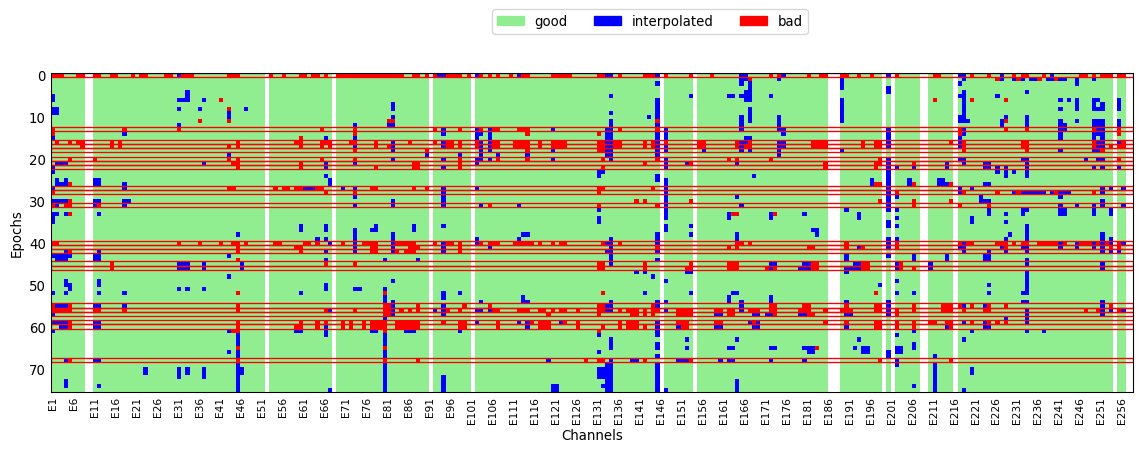

In [5]:
# depending of the resampling - different number of epochs are rejected
reject_log = get_reject_log(epochs, resample=125, consensus=[0.10])
reject_plot = reject_log.plot("vertical")

## Show bad epochs


No projector specified for this dataset. Please consider the method self.add_proj.


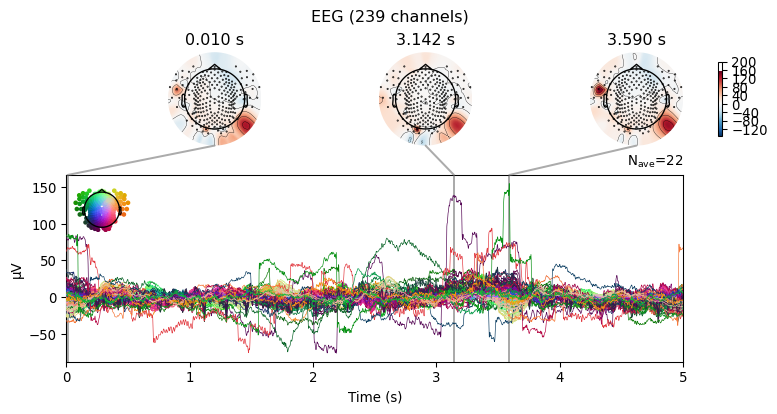

Effective window size : 4.096 (s)


Averaging across epochs...


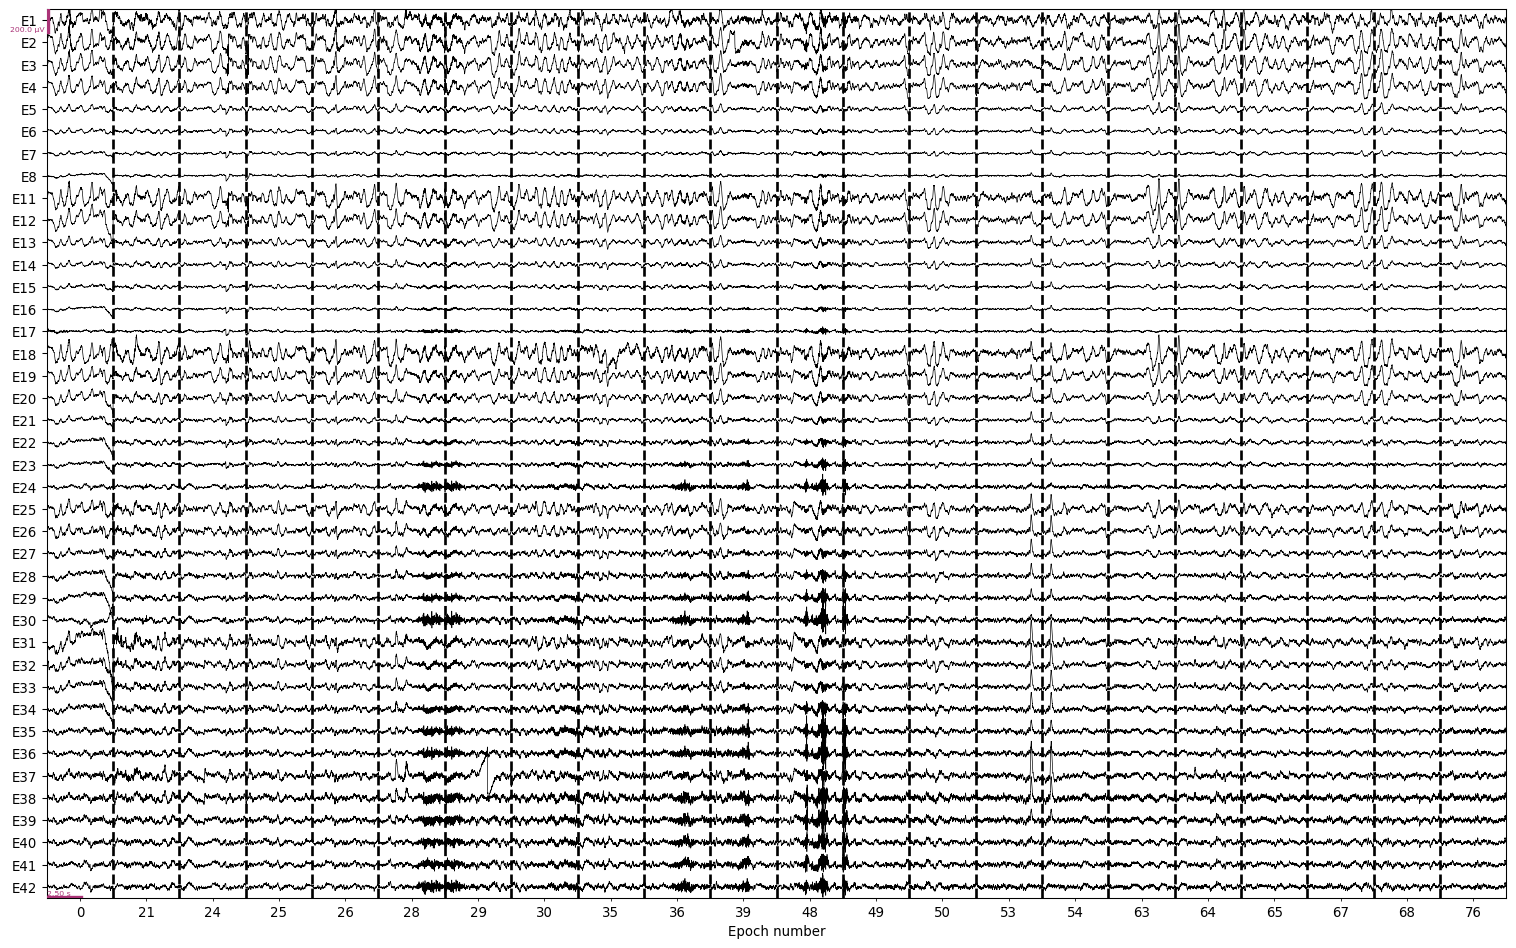

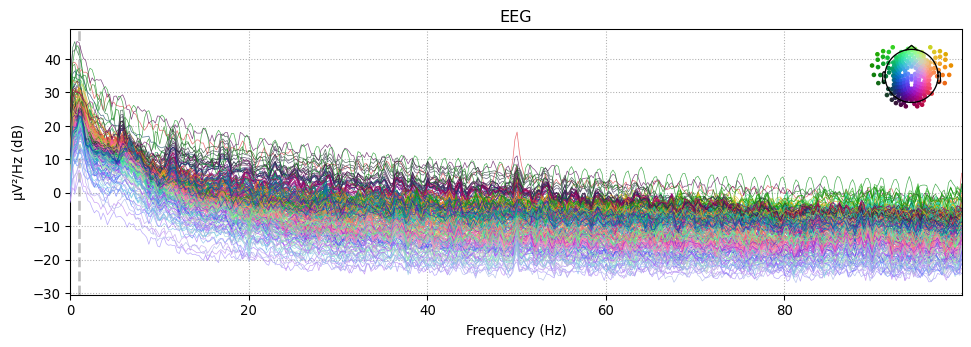

In [6]:
plot_epochs(
    epochs[reject_log.bad_epochs],
    figures_path=figures_path,
    subject=subject,
    stage="autoreject_bad_epochs",
    n_epochs=len(epochs[reject_log.bad_epochs]),
    n_channels=40,
)

# Show good epochs after removal


No projector specified for this dataset. Please consider the method self.add_proj.


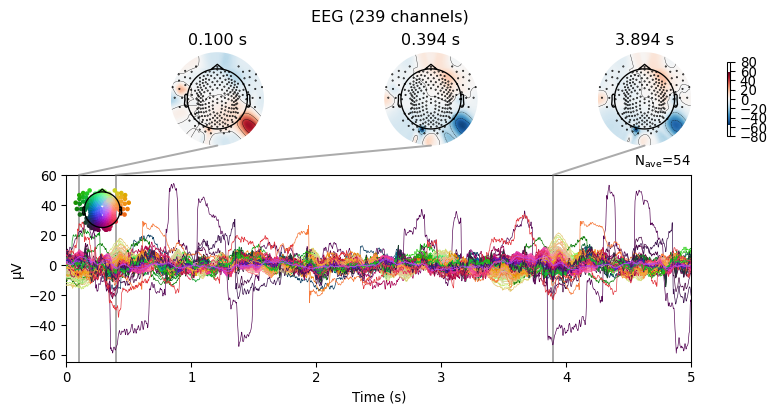

Effective window size : 4.096 (s)


Averaging across epochs...


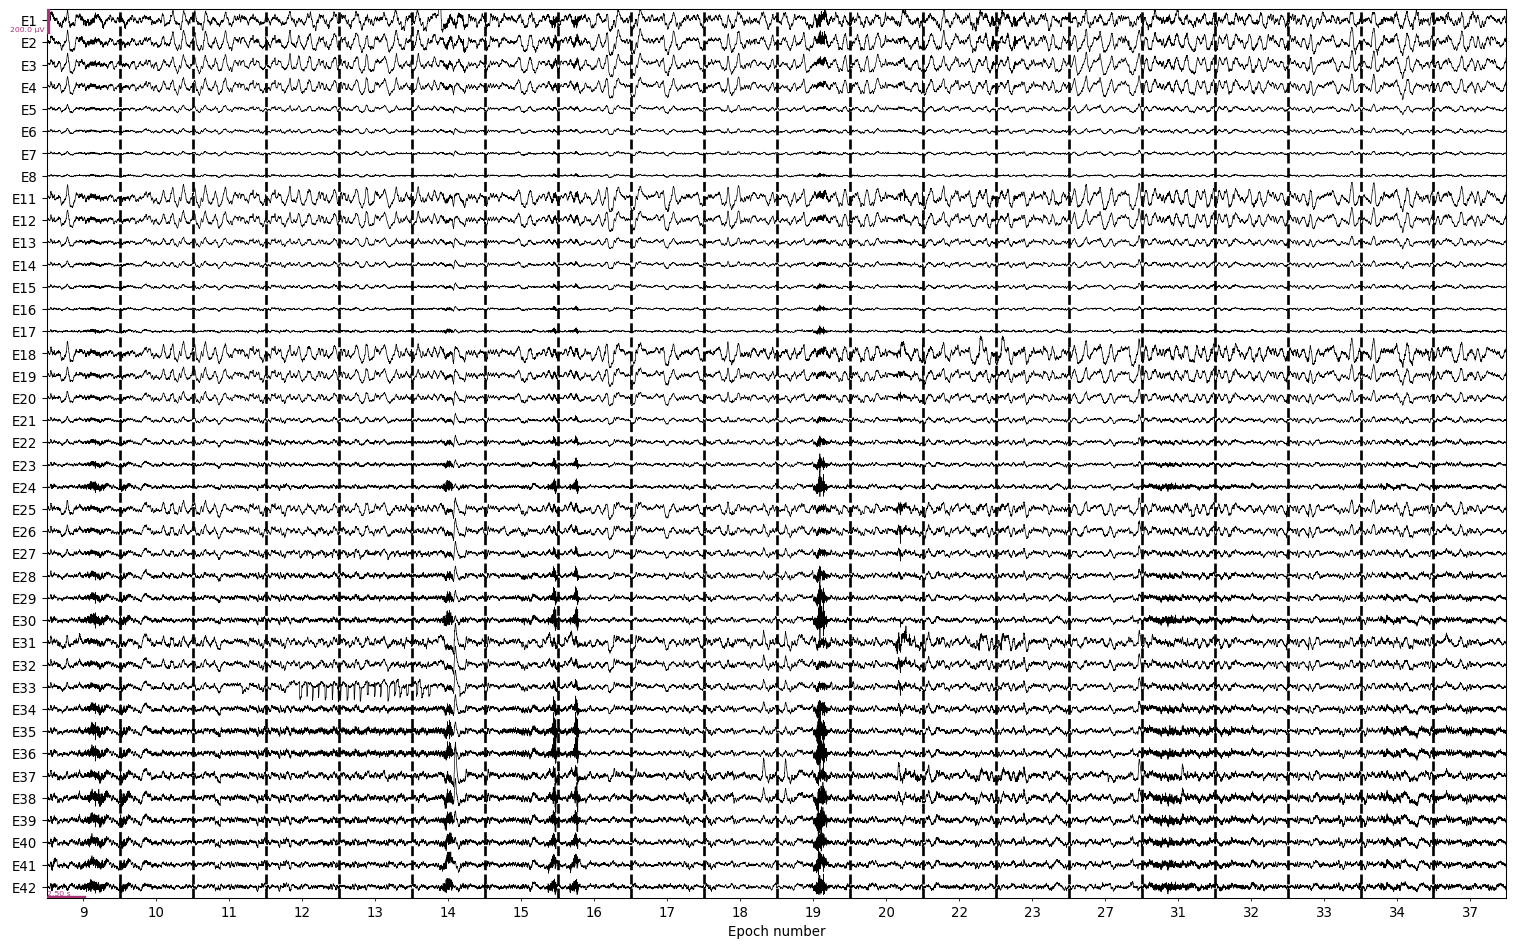

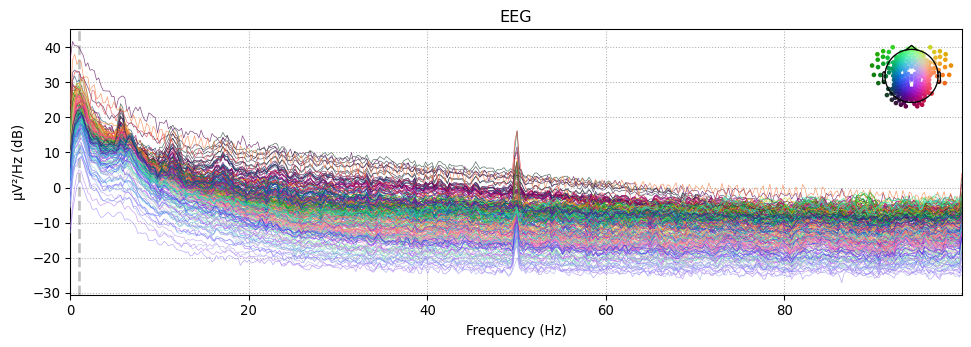

In [7]:
plot_epochs(
    epochs[~reject_log.bad_epochs],
    figures_path=figures_path,
    subject=subject,
    stage="autoreject_good_epochs",
    n_epochs=20,
    n_channels=40,
)

In [8]:
epochs[~reject_log.bad_epochs].save(
    f"{epochs_preproc_path}/sub-{subject}_drop_bad-epo.fif", overwrite=True
)

In [9]:
print(f"Sub{subject} -  removed {sum(reject_log.bad_epochs)} epochs")
print(f"Sub{subject} -  retained {len(epochs[~reject_log.bad_epochs])} epochs")

print_date_time()

Sub152 -  removed 22 epochs
Sub152 -  retained 54 epochs
2024-03-25 12:36:50
